In [35]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import corner
import scipy 

In [36]:
n = 15
x_i = 0
x_f = 2
sigma = 0.1

x = np.linspace(x_i,x_f,n)
y_t = 3*x + 2
y_dis = sigma*np.random.randn(n)
y = y_t + y_dis
y_err = sigma + 0.01*np.random.randn(n)
np.savetxt('recta.txt',(x,y,y_err))

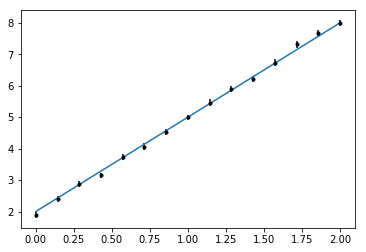

In [37]:
plt.errorbar(x,y,yerr=y_err, fmt='k.',ecolor='black')
plt.plot(x,y_t);

In [38]:
np.random.multivariate_normal([2,3],[[0.01, 0], [0, 0.01]])

array([1.99345793, 2.9832804 ])

In [39]:
#Modelo
def recta(x,a,b):
    return a*x + b

#Funcion para calcular la chi cuadrada
def chisq(theta,data):
    x = data[0]
    y = data[1]
    y_err = data[2]
    
    model = recta(x,theta[0],theta[1])
    chisq = (y-model)**2 / y_err**2
    
    return chisq.sum()

In [40]:
x = np.loadtxt('recta.txt')[0]
y = np.loadtxt('recta.txt')[1]
y_err = np.loadtxt('recta.txt')[2]

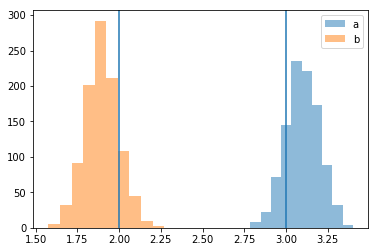

In [41]:
a0,sigma_a0= 3.1,0.1 
b0,sigma_b0 = 1.9,0.1

a_t = 3
b_t = 2

a_sample = np.random.normal(a0,sigma_a0,1000)
b_sample = np.random.normal(b0,sigma_b0,1000)

plt.hist(a_sample,alpha = 0.5, label = 'a')
plt.hist(b_sample,alpha = 0.5, label = 'b')
plt.axvline(a_t)
plt.axvline(b_t)
plt.legend();

In [42]:
chisq_ = np.zeros_like(a_sample)
for i in range(len(a_sample)):
    chisq_[i] = chisq([a_sample[i],b_sample[i]],[x,y,y_err])

In [43]:
minimo = np.where(chisq_==np.min(chisq_))[0][0]

print('a minimo es:',a_sample[minimo])
print('b minimo es:',b_sample[minimo])

a minimo es: 3.071080626953037
b minimo es: 1.9156167588818696


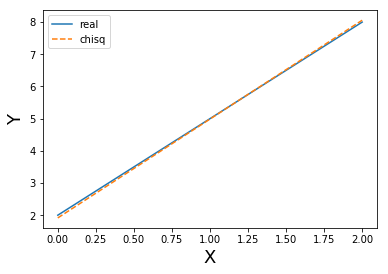

In [44]:
plt.plot(x,y_t,label = 'real')
plt.plot(x,a_sample[minimo]*x+b_sample[minimo],'--',label = 'chisq')
plt.xlabel('X',fontsize = 18)
plt.ylabel('Y',fontsize = 18)
plt.legend();

<Figure size 432x288 with 0 Axes>

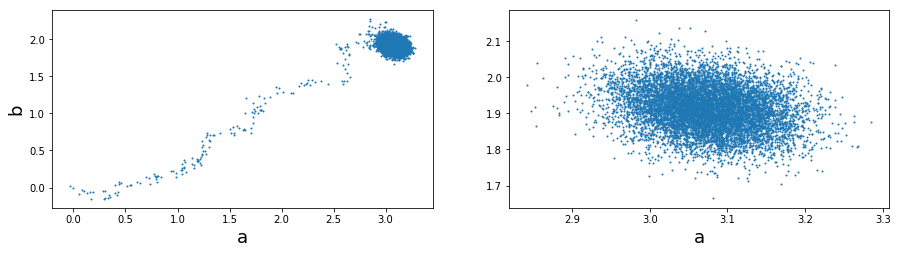

10001


In [98]:
np.random.seed(1)

#Parametros iniciales

#inicio de a y b
a_ini = 0.
b_ini = 0.

# sigma de a y b
d_a = 0.05
d_b = 0.05

a = [a_ini]
b = [b_ini]
ch_0 = chisq([a_ini,b_ini],[x,y,y_err])
for i in range(10000): 
    a_af = np.random.normal(a_ini,d_a) 
    b_af = np.random.normal(b_ini,d_b) 
    ch = chisq([a_af,b_af],[x,y,y_err])
    if ch < ch_0:
        a.append(a_af)
        b.append(b_af)
        a_ini = a_af
        b_ini = b_af
        ch_0 = ch
        
    else:
        r = -np.log(np.random.uniform(0,1))
        diff = abs(ch-ch_0)
        if diff<r:
            a.append(a_af)
            b.append(b_af)
            a_ini = a_af
            b_ini = b_af
            ch_0 = ch

        else:
            a.append(a_af)
            b.append(b_af)
            

a_fl = a[1000:]            
b_fl = b[1000:]

plt.figure(3)
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.scatter(a,b,s=1)
plt.ylabel('b',fontsize=18)
plt.xlabel('a',fontsize=18)

plt.subplot(222)
plt.scatter(a_fl,b_fl,s=1)
plt.xlabel('a',fontsize=18)
plt.show();

print(len(a))

<Figure size 432x288 with 0 Axes>

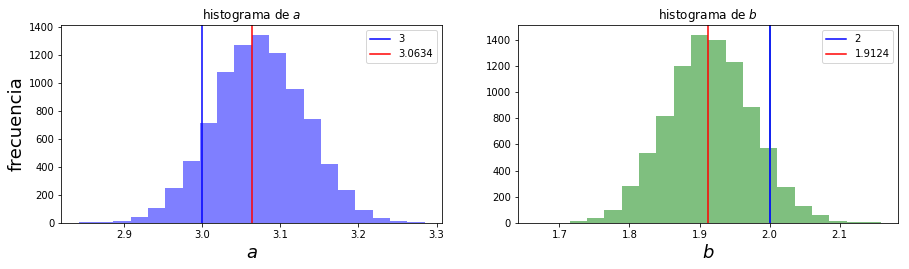

In [99]:
plt.figure(3)
plt.figure(figsize=(15,8))
plt.subplot(221)
hist_a = plt.hist(a_fl, bins=20,facecolor='blue',alpha = 0.5)
a_m = np.mean(hist_a[1])
plt.axvline(a_t,color='b',label = np.round(a_t,4))
plt.axvline(a_m,color='r',label = np.round(a_m,4))
plt.title("histograma de $a$")
plt.xlabel("$a$",fontsize=18)
plt.ylabel("frecuencia",fontsize=18)
plt.legend();

plt.subplot(222)
plt.axvline(b_t)
hist_b = plt.hist(b_fl, bins=20,facecolor='g', alpha = 0.5)
b_m = np.mean(hist_b[1])
plt.axvline(b_t,color='b',label = np.round(b_t,4))
plt.axvline(b_m,color='r',label = np.round(b_m,4))
plt.title("histograma de $b$")
plt.xlabel("$b$",fontsize=18)
plt.legend()
plt.show();

In [136]:
def metrop(a_ini,b_ini,data,sigm,flags):
    np.random.seed(1)
    #Reordenamos el arreglo de a y b iniciales.
    a_ini = a_ini.T.reshape((len(a_ini),1))
    b_ini = b_ini.T.reshape((len(b_ini),1))
    data = np.array(data)
    
    ch_ini = [] #iniciamos lista para los valores de chi iniciales.
    
    #Llenamos chi_ini con los valores iniciales 
    for i in range(len(a_ini)):
        ch_ini.append(chisq([a_ini[i][0],b_ini[i][0]],data))
    
    #Transformamos a_ini de array a list para usar la función append.
    a = a_ini.tolist()
    b = b_ini.tolist()
    
    for i in range(len(a_ini)):
        ch_0 = ch_ini[i]
        k = 0
        for j in range(10000): 
            a_af = np.random.normal(a[i][k],sigm) 
            b_af = np.random.normal(b[i][k],sigm) 
            ch = chisq([a_af,b_af],data)
            if ch < ch_0:
                a[i].append(a_af)
                b[i].append(b_af)
                k = k+1
                ch_0 = ch
            else:
                r = -np.log(np.random.uniform(0,1)) 
                diff = abs(ch-ch_0)
                if diff<r:
                    a[i].append(a_af)
                    b[i].append(b_af)
                    k = k+1
                    ch_0 = ch
                else:
                    a[i].append(a[i][k])
                    b[i].append(b[i][k])
                    k = k+1
            

    # Parte de grafico
    plt.figure(figsize=(15,10))    
    
    #Gráfica de todos los puntos
    plt.subplot(221)
    for i in range(len(a_ini)):     
        plt.scatter(a[i],b[i],s=1)
    plt.ylabel('b',fontsize=18)
    plt.xlabel('a',fontsize=18)
    
    #Gráfica de de los puntos sin los primeros caminos
    a_flg = np.array([])
    b_flg = np.array([])
    for i in range(len(a_ini)): 
        a_flg = np.append(a_flg,a[i][flags:])
        b_flg = np.append(b_flg,b[i][flags:])
    
    plt.subplot(222)
    plt.scatter(a_flg,b_flg,s=1)
    plt.xlabel('a',fontsize=18)
    plt.show();
    
    return a_flg , b_flg, a, b

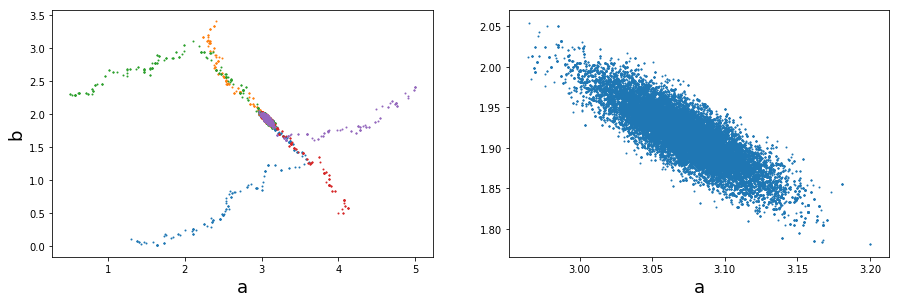

In [138]:
data = [x,y,y_err]
sigm = 0.05
a_ini = np.array([1.3,2.4,0.5,4,5])
b_ini = np.array([0.1,3.4,2.3,0.5,2.4])
flags = 180
a,b, a_T,b_T= metrop(a_ini,b_ini,data,sigm,flags)

In [139]:
len(a_T[0])

10001

<Figure size 432x288 with 0 Axes>

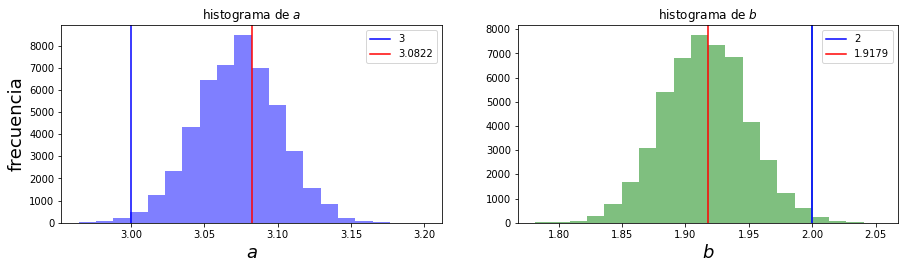

In [140]:
plt.figure(3)
plt.figure(figsize=(15,8))
plt.subplot(221)
hist_a = plt.hist(a, bins=20,facecolor='blue',alpha = 0.5)
a_m = np.mean(hist_a[1])
plt.axvline(a_t,color='b',label = np.round(a_t,4))
plt.axvline(a_m,color='r',label = np.round(a_m,4))
plt.title("histograma de $a$")
plt.xlabel("$a$",fontsize=18)
plt.ylabel("frecuencia",fontsize=18)
plt.legend();

plt.subplot(222)
plt.axvline(b_t)
hist_b = plt.hist(b, bins=20,facecolor='g', alpha = 0.5)
b_m = np.mean(hist_b[1])
plt.axvline(b_t,color='b',label = np.round(b_t,4))
plt.axvline(b_m,color='r',label = np.round(b_m,4))
plt.title("histograma de $b$")
plt.xlabel("$b$",fontsize=18)
plt.legend()
plt.show();

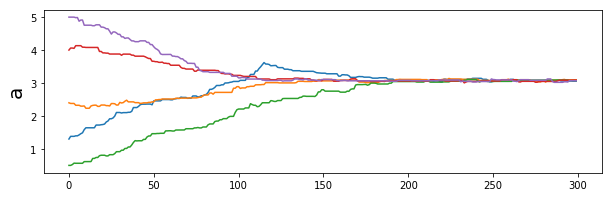

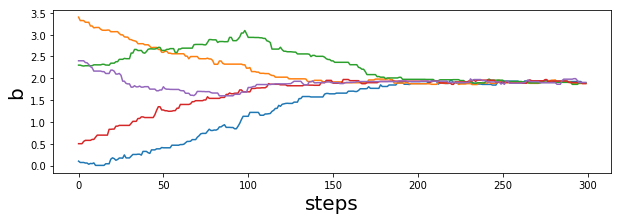

In [141]:
# Graficamos los caminadores
plt.figure(figsize=(10,3))
n = 300
for i in range(len(a_T)):
    steps_a = np.arange(len(a_T[i][:n]))
    plt.plot(steps_a, a_T[i][:n], '-')
    plt.ylabel('a',fontsize = 20)
plt.show();

plt.figure(figsize=(10,3))
for i in range(len(a_T)):  
    steps_b = np.arange(len(b_T[i][:n]))
    plt.plot(steps_b, b_T[i][:n], '-')
    plt.ylabel('b',fontsize = 20)
    plt.xlabel('steps',fontsize = 20)
plt.show();

In [121]:
def priori (theta):
    a,b = theta
    if np.tan(20*(np.pi/180)) < a < np.tan(80*(np.pi/180)) and 1.5 < b < 4.5:
        return 1.0
    else:
        return 0.0

In [162]:
#Intento de hacer el metodo con el likelihood
def metrop_pri(a_ini,b_ini,data,sigm,flags):
    
    #Reordenamos el arreglo de a y b iniciales.
    a_ini = a_ini.T.reshape((len(a_ini),1))
    b_ini = b_ini.T.reshape((len(b_ini),1))
    data = np.array(data)
    
    ch_ini = [] #iniciamos lista para los valores de chi iniciales.
    
    #Llenamos chi_ini con los valores iniciales 
    for i in range(len(a_ini)):
        ch_ini.append(chisq([a_ini[i][0],b_ini[i][0]],data))
    
    #Transformamos a_ini de array a list para usar la función append.
    a = a_ini.tolist()
    b = b_ini.tolist()
    
    P_A = []
    
    for i in range(len(a_ini)):
        P_0 = np.exp(-ch_ini[i])#*priori([a[i][0],b[i][0]])
        k = 0
        for j in range(10000): 
            a_af = np.random.normal(a[i][k],sigm) 
            b_af = np.random.normal(b[i][k],sigm) 
            P = np.exp(-chisq([a_af,b_af],data))#*priori([a_af,b_af])
            if P > P_0:
                a[i].append(a_af)
                b[i].append(b_af)
                k = k+1
                P_0 = P
                P_A.append(P)
            else:
                r = np.random.uniform(0,1) 
                diff = abs(P/P_0)
                if diff > r:
                    a[i].append(a_af)
                    b[i].append(b_af)
                    k = k+1
                    P_0 = P
                    P_A.append(P)
                else:
                    a[i].append(a[i][k])
                    b[i].append(b[i][k])
                    k = k+1

    # Parte de grafico
    plt.figure(figsize=(15,10))    
    
    #Gráfica de todos los puntos
    plt.subplot(221)
    for i in range(len(a_ini)):     
        plt.scatter(a[i],b[i],s=1)
    plt.ylabel('b',fontsize=18)
    plt.xlabel('a',fontsize=18)
    
    #Gráfica de de los puntos sin los primeros caminos
    a_flg = np.array([])
    b_flg = np.array([])
    for i in range(len(a_ini)): 
        a_flg = np.append(a_flg,a[i][flags:])
        b_flg = np.append(b_flg,b[i][flags:])
    
    plt.subplot(222)
    plt.scatter(a_flg,b_flg,s=1)
    plt.xlabel('a',fontsize=18)
    plt.show();
    
    return a_flg , b_flg, a, b, P_A

/usr/lib/python3/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


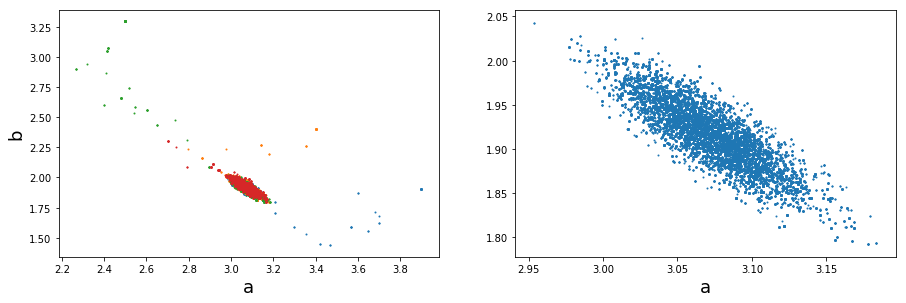

<Figure size 432x288 with 0 Axes>

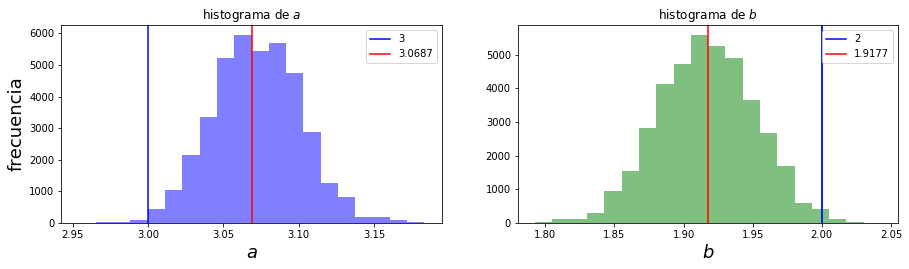

In [161]:
data = [x,y,y_err]
sigm = 0.05
a_ini = np.array([3.9,3.4,2.5,2.7])
b_ini = np.array([1.9,2.4,3.3,2.3])
flags = 100
a,b, a_T,b_T,P_A= metrop_pri(a_ini,b_ini,data,sigma,flags)

plt.figure(3)
plt.figure(figsize=(15,8))
plt.subplot(221)
hist_a = plt.hist(a, bins=20,facecolor='blue',alpha = 0.5)
a_m = np.mean(hist_a[1])
plt.axvline(a_t,color='b',label = np.round(a_t,4))
plt.axvline(a_m,color='r',label = np.round(a_m,4))
plt.title("histograma de $a$")
plt.xlabel("$a$",fontsize=18)
plt.ylabel("frecuencia",fontsize=18)
plt.legend();

plt.subplot(222)
plt.axvline(b_t)
hist_b = plt.hist(b, bins=20,facecolor='g', alpha = 0.5)
b_m = np.mean(hist_b[1])
plt.axvline(b_t,color='b',label = np.round(b_t,4))
plt.axvline(b_m,color='r',label = np.round(b_m,4))
plt.title("histograma de $b$")
plt.xlabel("$b$",fontsize=18)
plt.legend()
plt.show();

In [157]:
len(P_A)

3206

In [158]:
t = np.append(a,b)
t = np.append(a,b).reshape((2,len(a))).T
print(t)
len(t)

[[3.06361605 1.92134366]
 [3.06361605 1.92134366]
 [3.06361605 1.92134366]
 ...
 [3.09211972 1.92355938]
 [3.09211972 1.92355938]
 [3.09211972 1.92355938]]


39604

ValueError: Contour levels must be increasing

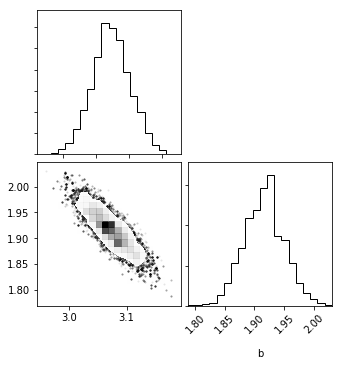

In [159]:
samples = np.append(a,b).reshape((2,len(t))).T
figure = corner.corner(samples,bins=[20,20],labels=["a", "b"])